In [1]:
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def rebin(df_in):
    # rebin values for each country
    countries = set(df_in['Country/Region'])

    xlength = len(countries)
    ylength = df_in.shape[1] - 4

    data = np.ones((ylength, xlength), dtype=float)
    df = pd.DataFrame(data, index=np.arange(ylength), columns=countries)

    for row in df_in.to_numpy():
        country = row[1]

        for i, n in enumerate(row[4:]):
            df[country][i] += n

    return df

In [3]:
def plot(df, countries, xmin=-180, xmax=0, ymin=1, ymax=2e7, title=None, linestyle='-', marker='s', log=True, mean=False):
    fig, ax = plt.subplots()
    
    for country, color in countries:
        x = df[country].index - df[country].index[-1]
        y = df[country]
        y_last = int(y[df[country].last_valid_index()])
        
        label = '{} ({})'.format(country, y_last)

        if log is not True:
            plt.plot(x, y, label=label, linestyle='--', marker=marker, color=color)
        else:
            plt.semilogy(x, y, label=label, linestyle='--', marker=marker, color=color)
            
        if mean:
            y_mean = df[country].rolling(7, center=True).mean()

            if log is not True:
                plt.step(x, y_mean, linestyle=linestyle, color=color)
            else:
                plt.semilogy(x, y_mean, linestyle=linestyle, color=color)
            
        
    if title:
        ax.set_title(title)

    ax.grid(True, which="major", color='black')
    ax.grid(True, which="minor", linestyle='--')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('days since {}'.format(date.today()))
    ax.set_xticks(np.arange(xmin, xmax + 1, 7))
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.legend(loc='upper left')

    fig = plt.gcf()
    fig.set_size_inches(36, 8)

In [4]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
df_confirmed = rebin(pd.read_csv(confirmed_url))
df_deaths = rebin(pd.read_csv(deaths_url))

In [6]:
deu = [
    ('Germany', 'tab:red'),
]

countries = [
    ('Germany', 'tab:red'),
    ('Sweden', 'tab:green'),
    ('Italy', 'tab:orange'),
    ('Austria', 'tab:brown'),
    ('United Kingdom', 'tab:gray'), 
    ('Spain', 'tab:pink'),
    ('US', 'tab:blue'),
    ('Belgium', 'tab:olive'),
#     ('Korea, South', 'tab:cyan'),
    ('France', 'tab:cyan'),
#     ('Singapore', 'tab:purple')
]

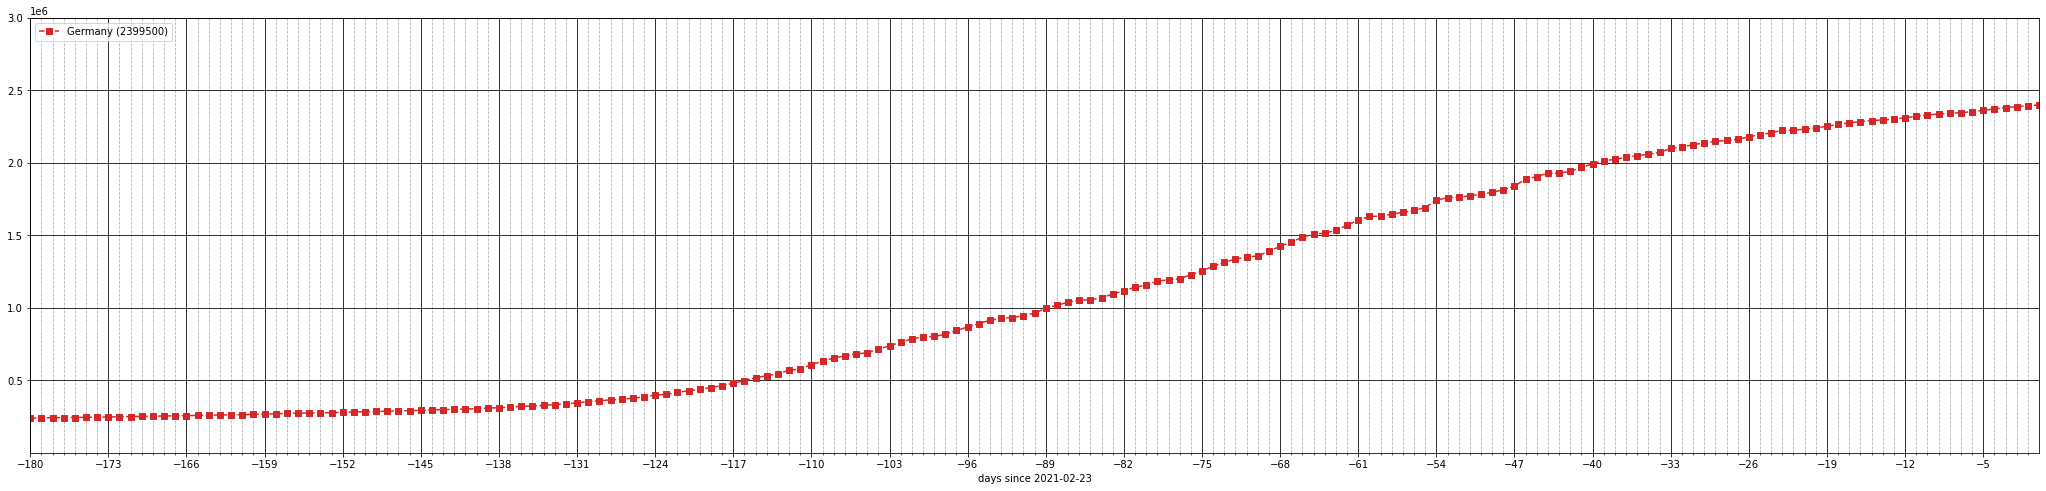

In [7]:
plot(df_confirmed, deu, log=False, ymax=3e6)

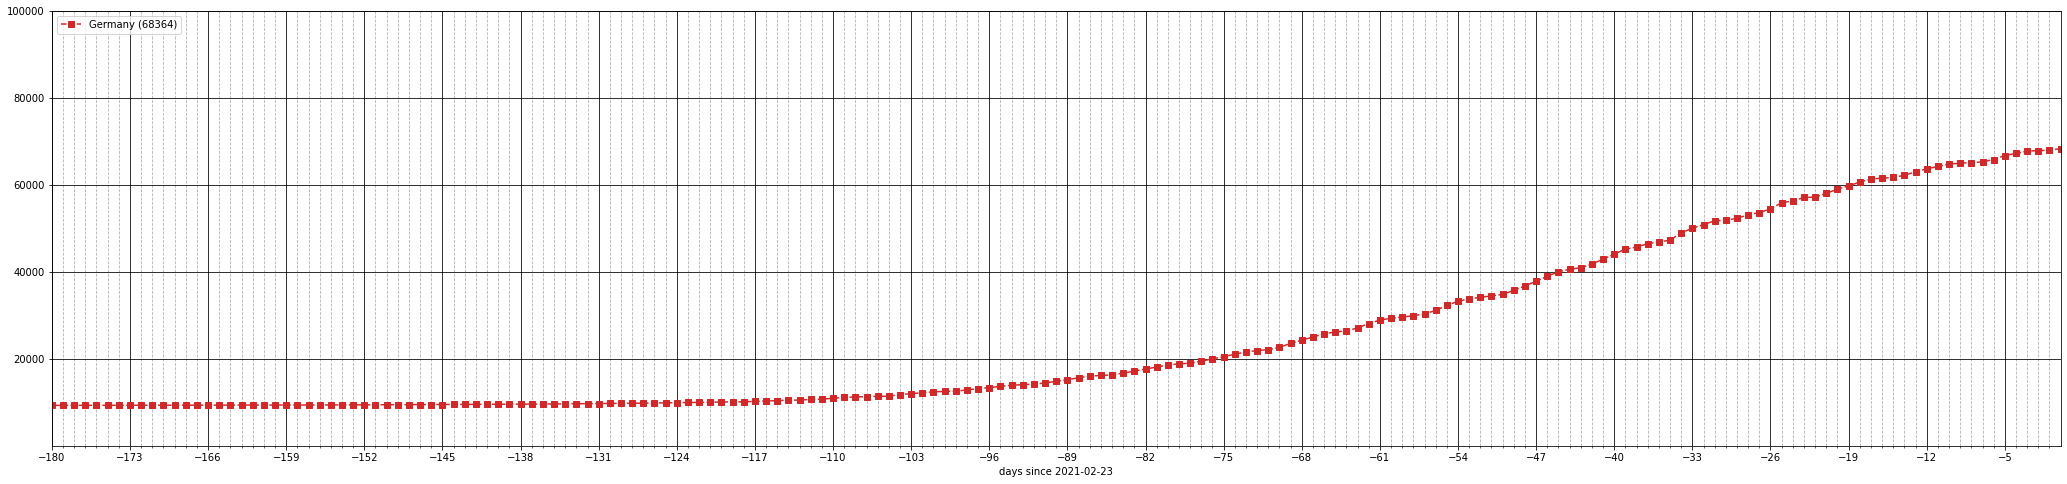

In [8]:
plot(df_deaths, deu, log=False, ymax=1e5)

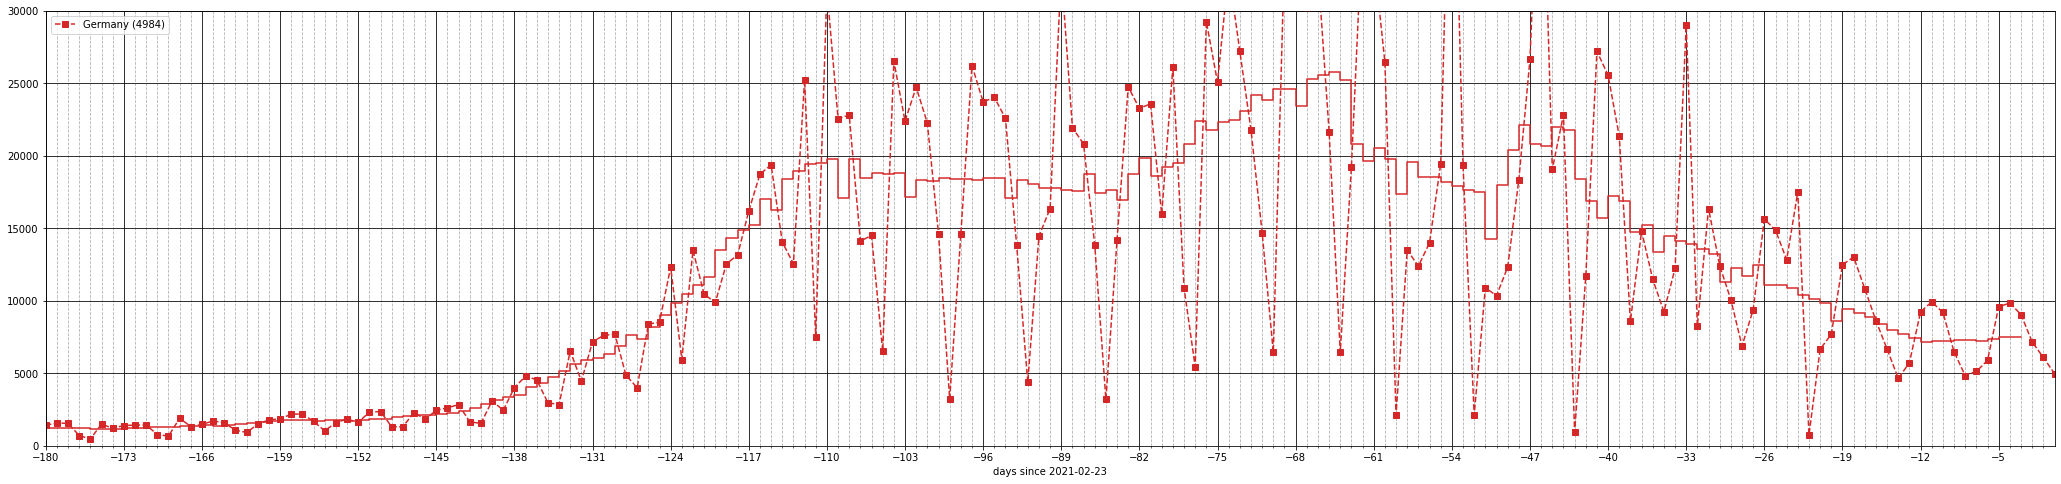

In [15]:
plot(df_confirmed.diff(), deu, ymin=0, ymax=3e4, mean=True, log=False)

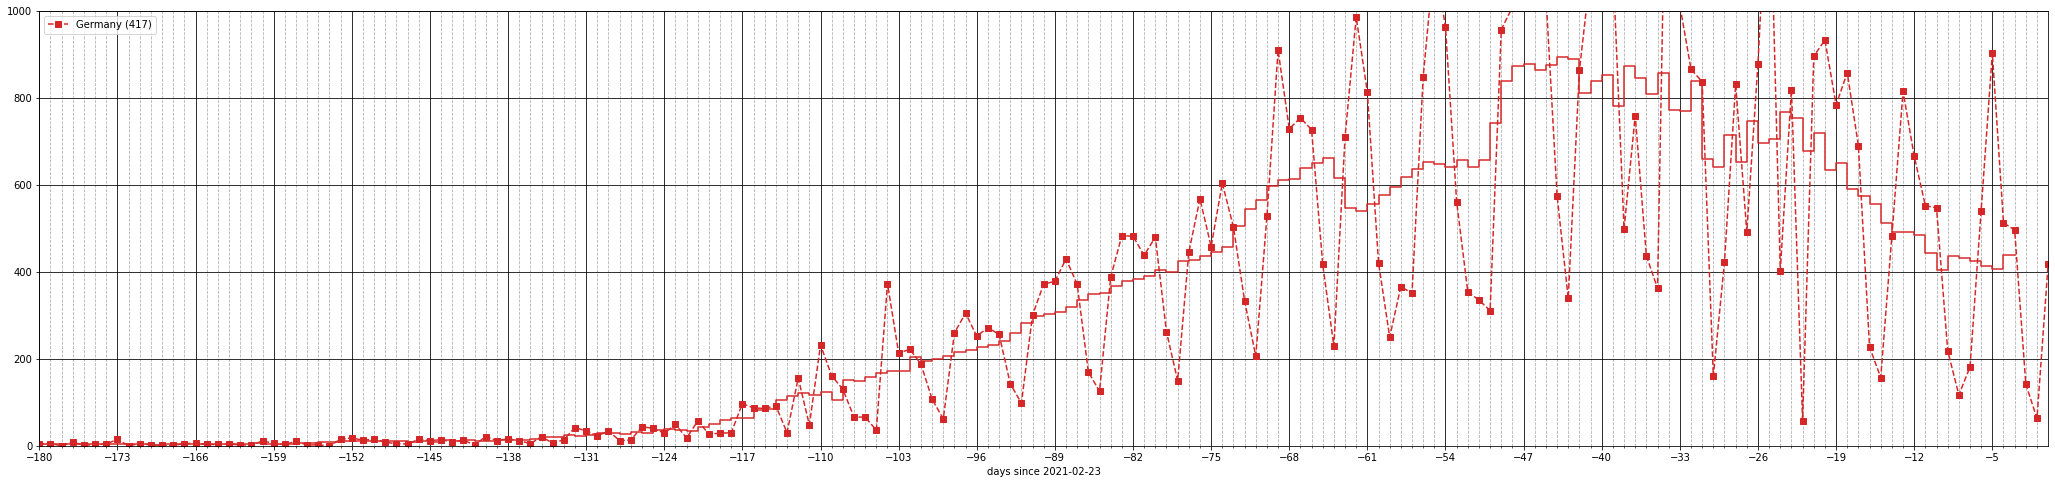

In [10]:
plot(df_deaths.diff(), deu, ymin=0, ymax=1e3, mean=True, log=False)

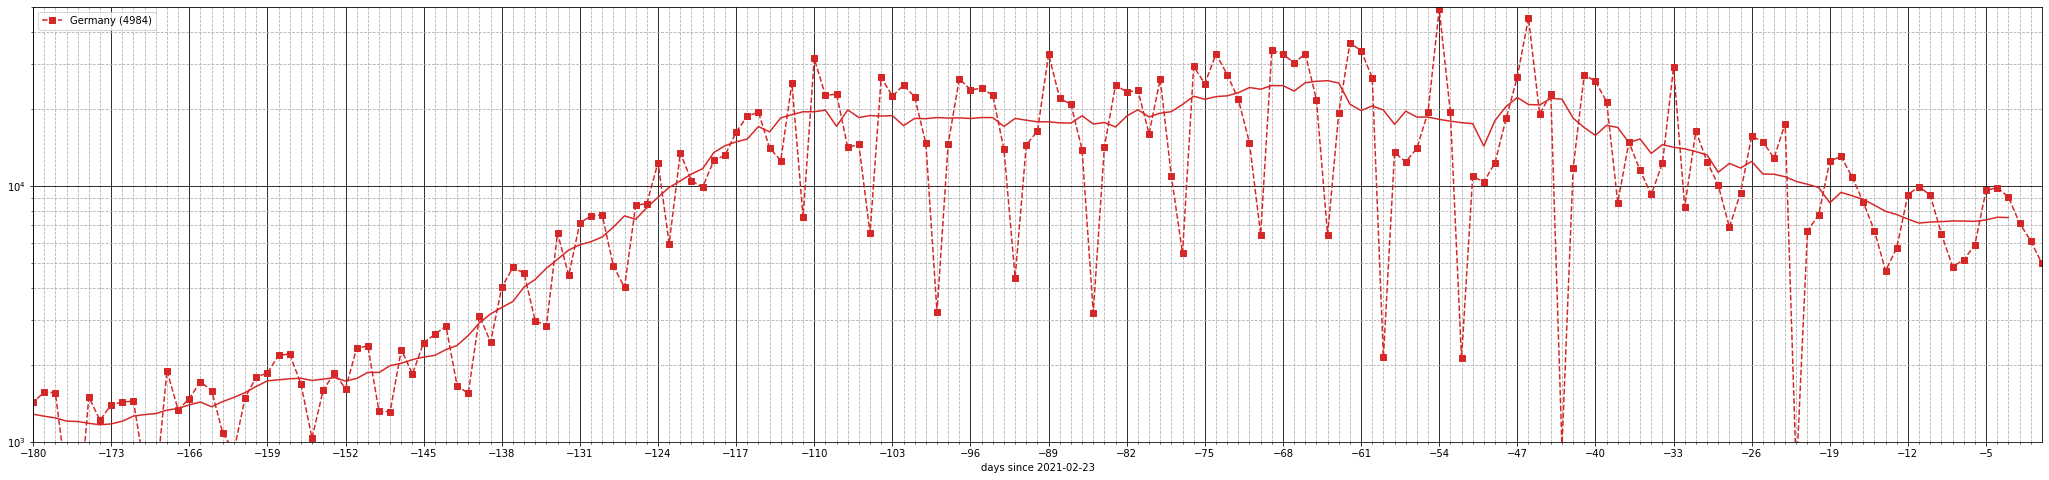

In [16]:
plot(df_confirmed.diff(), deu, ymin=1e3, ymax=5e4, mean=True)

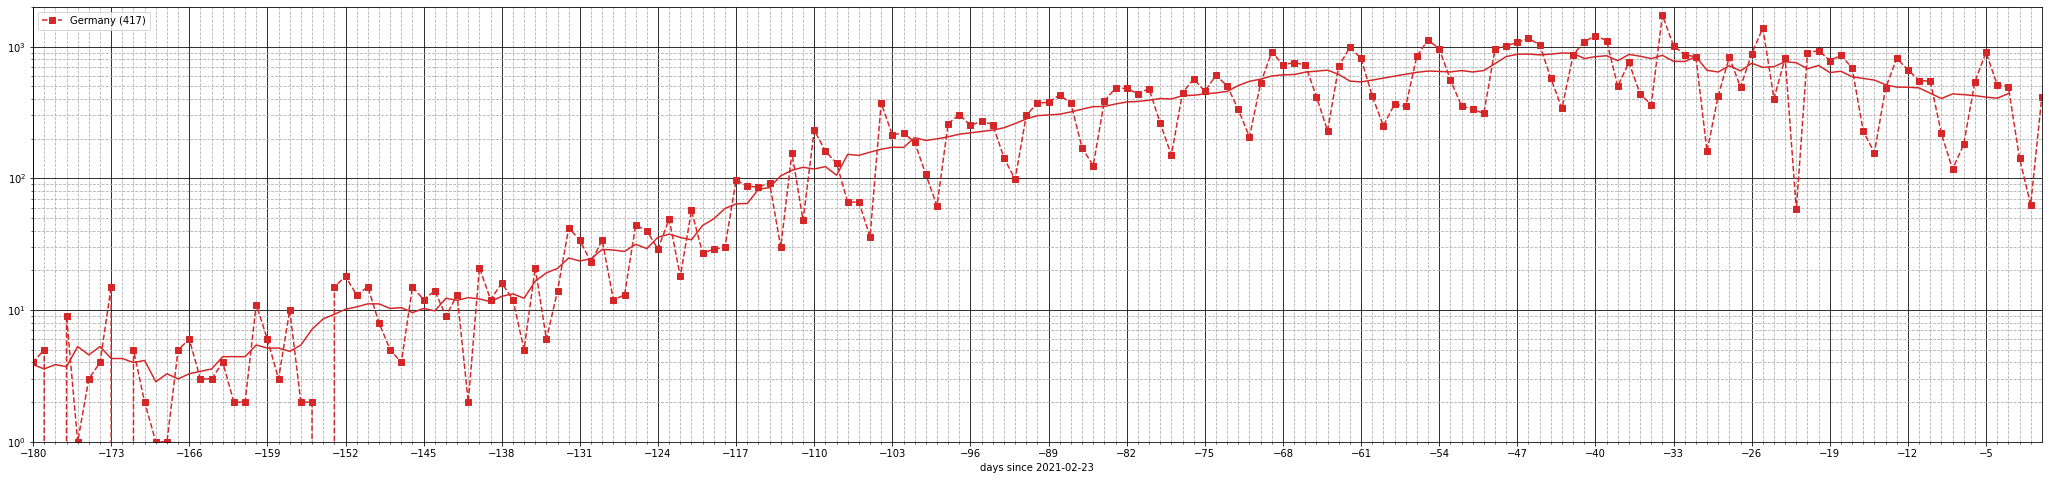

In [12]:
plot(df_deaths.diff(), deu, ymin=1, ymax=2e3, mean=True)

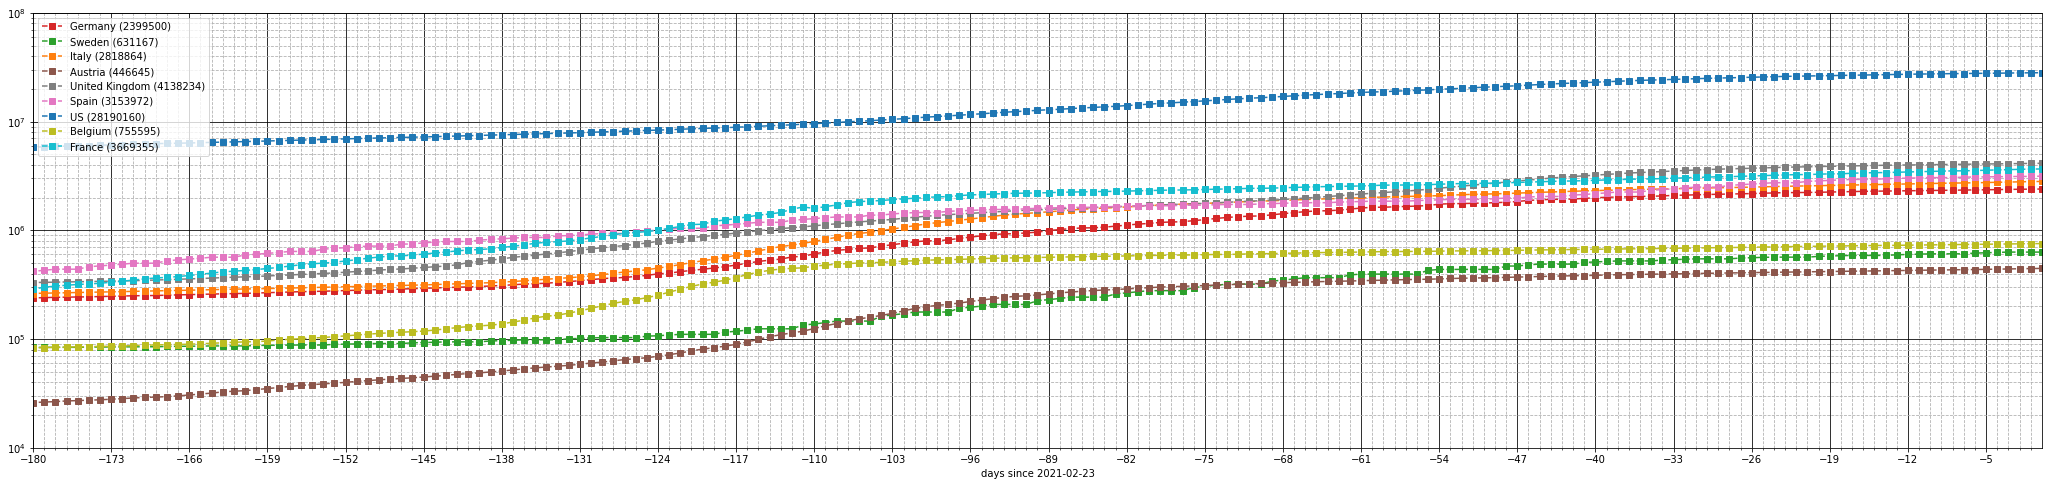

In [13]:
plot(df_confirmed, countries, ymin=1e4, ymax=1e8)

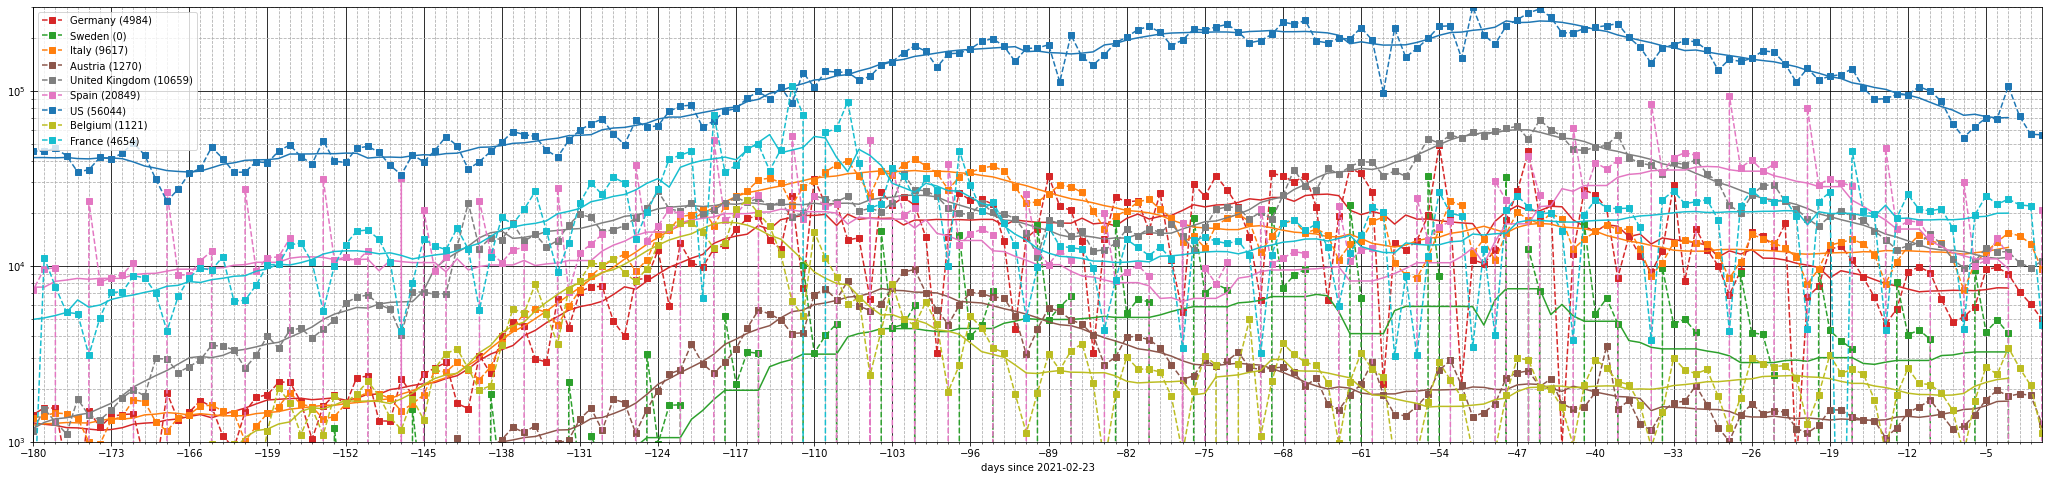

In [14]:
plot(df_confirmed.diff(), countries, ymin=1000, ymax=3e5, mean=True, log=True)